Actualizacion de software y instalacion de librerias

In [ ]:
!apt update
!pip install -U bnlearn
!pip install -U matplotlib==3.3.4

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,496 kB]
Hit:13 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-updates/restricted amd64 Pa

Importacion de librerias y lectura de dataset

In [ ]:
import pandas as pd
import bnlearn as bn
 
df = pd.read_csv("dataset.csv")
 
print(df)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

Creacion de modelo

[bnlearn] >Warning: Computing DAG with 12 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


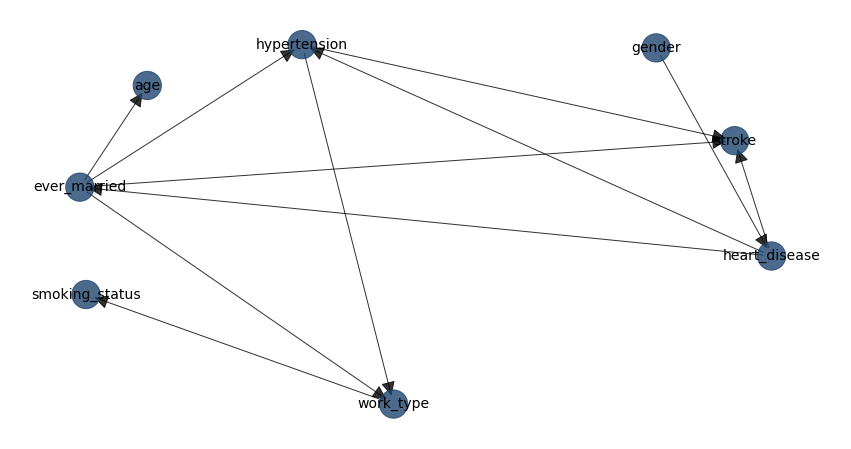

In [ ]:
model = bn.structure_learning.fit(df)
G = bn.plot(model)

In [ ]:
model_update = bn.parameter_learning.fit(model, df)
Gg = bn.plot(model_update, interactive=True, params_interactive={'notebook':True})

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianNetwork.
[bnlearn] >CPD of gender:
+----------------+-----------+
| gender(Female) | 0.54668   |
+----------------+-----------+
| gender(Male)   | 0.396739  |
+----------------+-----------+
| gender(Other)  | 0.0565804 |
+----------------+-----------+
[bnlearn] >CPD of heart_disease:
+------------------+-----+--------------------+
| gender           | ... | gender(Other)      |
+------------------+-----+--------------------+
| heart_disease(0) | ... | 0.5014955134596212 |
+------------------+-----+--------------------+
| heart_disease(1) | ... | 0.4985044865403789 |
+------------------+-----+--------------------+
[bnlearn] >CPD of hypertension:
+-----------------+-----+--------------------+
| ever_married    | ... | ever_married(Yes)  |
+-----------------+-----+--------------------+
| heart_disease   | ... | heart_disease(1)   |
+-----------------+-----+--------------------+
| h

Primera inferencia

In [ ]:
q_1 = bn.inference.fit(model_update, variables=['work_type'], evidence={'stroke':1})

[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+----+-------------+-----------+
|    |   work_type |         p |
+====+=============+===========+
|  0 |           0 | 0.142415  |
+----+-------------+-----------+
|  1 |           1 | 0.0400052 |
+----+-------------+-----------+
|  2 |           2 | 0.51635   |
+----+-------------+-----------+
|  3 |           3 | 0.166454  |
+----+-------------+-----------+
|  4 |           4 | 0.134775  |
+----+-------------+-----------+


Segunda Inferencia

In [ ]:
q_2 = bn.inference.fit(model_update, variables=['stroke'], evidence={'hypertension':1})

[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+----+----------+----------+
|    |   stroke |        p |
+====+==========+==========+
|  0 |        0 | 0.919481 |
+----+----------+----------+
|  1 |        1 | 0.080519 |
+----+----------+----------+


In [ ]:
q_3 = bn.inference.fit(model_update, variables=['stroke'], evidence={'hypertension':0})

[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+----+----------------+----------+
|    |   hypertension |        p |
+====+================+==========+
|  0 |              0 | 0.873893 |
+----+----------------+----------+
|  1 |              1 | 0.126107 |
+----+----------------+----------+


Tercera inferencia

In [ ]:
q_4 = bn.inference.fit(model_update, variables=['heart_disease'], evidence={'hypertension':1})

[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+----+-----------------+----------+
|    |   heart_disease |        p |
+====+=================+==========+
|  0 |               0 | 0.672927 |
+----+-----------------+----------+
|  1 |               1 | 0.327073 |
+----+-----------------+----------+


In [ ]:
q_5 = bn.inference.fit(model_update, variables=['heart_disease'], evidence={'hypertension':0})

[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+----+-----------------+-----------+
|    |   heart_disease |         p |
+====+=================+===========+
|  0 |               0 | 0.912201  |
+----+-----------------+-----------+
|  1 |               1 | 0.0877989 |
+----+-----------------+-----------+


Cuarta inferencia

In [ ]:
q_6 = bn.inference.fit(model_update, variables=['heart_disease','stroke'], evidence={'hypertension':0})

[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+----+-----------------+----------+-----------+
|    |   heart_disease |   stroke |         p |
+====+=================+==========+===========+
|  0 |               0 |        0 | 0.862848  |
+----+-----------------+----------+-----------+
|  1 |               0 |        1 | 0.0494151 |
+----+-----------------+----------+-----------+
|  2 |               1 |        0 | 0.0566761 |
+----+-----------------+----------+-----------+
|  3 |               1 |        1 | 0.0310609 |
+----+-----------------+----------+-----------+


In [ ]:
q_7 = bn.inference.fit(model_update, variables=['heart_disease','stroke'], evidence={'hypertension':1})

[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+----+-----------------+----------+----------+
|    |   heart_disease |   stroke |        p |
+====+=================+==========+==========+
|  0 |               0 |        0 | 0.493165 |
+----+-----------------+----------+----------+
|  1 |               0 |        1 | 0.182965 |
+----+-----------------+----------+----------+
|  2 |               1 |        0 | 0.180862 |
+----+-----------------+----------+----------+
|  3 |               1 |        1 | 0.143007 |
+----+-----------------+----------+----------+


Quinta inferencia

In [ ]:
q_8 = bn.inference.fit(model_update, variables=['hypertension'], evidence={'gender':0})

[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+----+----------------+----------+
|    |   hypertension |        p |
+====+================+==========+
|  0 |              0 | 0.851587 |
+----+----------------+----------+
|  1 |              1 | 0.148413 |
+----+----------------+----------+


In [ ]:
q_9 = bn.inference.fit(model_update, variables=['hypertension'], evidence={'gender':1})

[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+----+----------------+----------+
|    |   hypertension |        p |
+====+================+==========+
|  0 |              0 | 0.837217 |
+----+----------------+----------+
|  1 |              1 | 0.162783 |
+----+----------------+----------+
